In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bar_parallax_analytic_model import bar_parallax3D, bar_parallax1D

# We can test with different bar structure parameters
custom_params = {
    'sigma_x': 0.67,  # Longer bar major axis
    'sigma_y': 0.29,  # Shorter bar minor axis
    'sigma_z': 0.27,  # Thinner bar vertically
    'r_E': 8.2,       # Closer bar center
    's_max': 15.0,     # Max distance from us for averaging
    #'epsrel': 1e-6    # Relative error tolerance for integration
}


# Define parameter ranges
l_range = np.arange(-15, 16, 1)  # Galactic longitude from -15 to +15 degrees
bar_angles = [0, 15, 20, 25, 29.4, 35, 40, 45, 90]  # Different bar angles to compare
b_values = [-3,-2, -1, -0.5, 0, 0.5, 1, 2, 3]  # different galactic latitudes


/Users/himanshuverma/Documents/MyHome/MyHomeLSU/Research/Topics/Roman/GaiaBarAngle/bar_parallax_analytic_model.py:196: RuntimeWarning: invalid value encountered in divide
  d = rE*np.tan(alpha) / ( np.sin(l) + np.cos(l)*np.tan(alpha) )
/Users/himanshuverma/Documents/MyHome/MyHomeLSU/Research/Topics/Roman/GaiaBarAngle/bar_parallax_analytic_model.py:198: RuntimeWarning: divide by zero encountered in divide
  return (1/d)#*(d**2)
/Users/himanshuverma/Documents/MyHome/MyHomeLSU/Research/Topics/Roman/GaiaBarAngle/bar_parallax_analytic_model.py:196: RuntimeWarning: divide by zero encountered in divide
  d = rE*np.tan(alpha) / ( np.sin(l) + np.cos(l)*np.tan(alpha) )


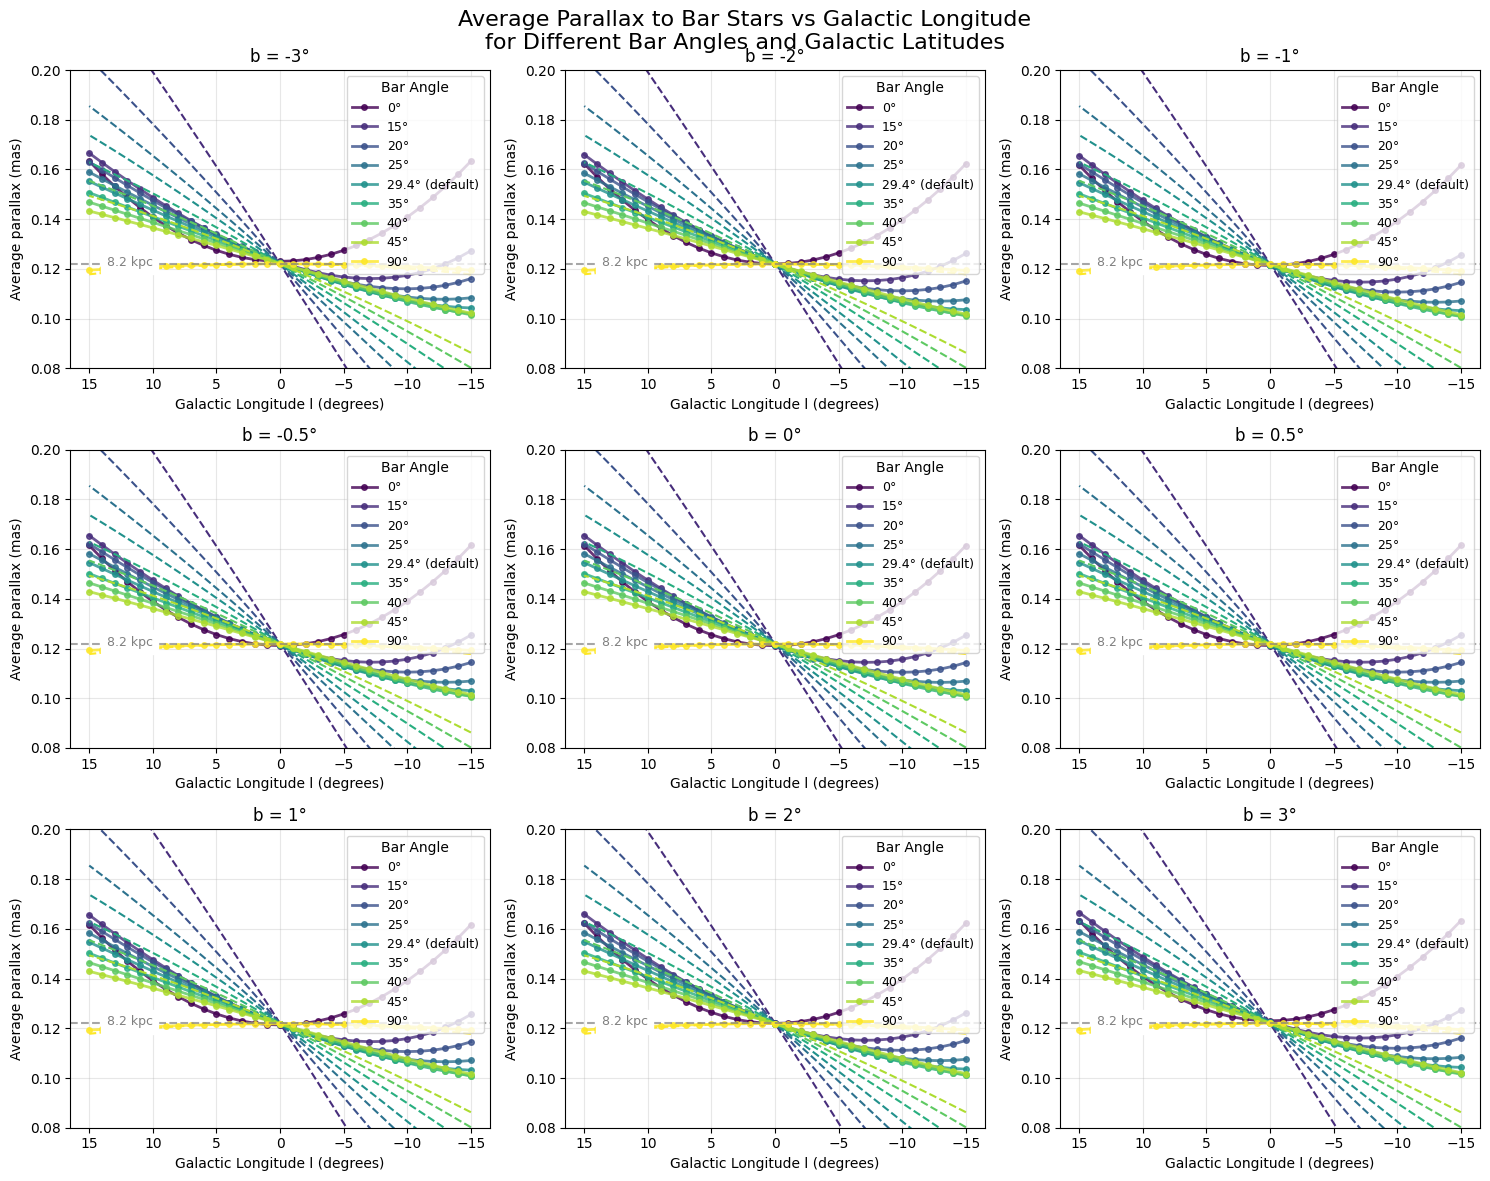

In [2]:
colors = plt.cm.viridis(np.linspace(0, 1, len(bar_angles)))

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.flatten()

for subplot_idx, b in enumerate(b_values):
    ax = axes[subplot_idx]
    
    for i, bar_angle in enumerate(bar_angles):
        Aparallax = []

        for l in l_range:
            try:
                parallax = bar_parallax3D(l, b, bar_angle, **custom_params)
                Aparallax.append(parallax if parallax else np.nan)
            except:
                Aparallax.append(np.nan)
        
        ax.plot(l_range, Aparallax, 'o-', 
                color=colors[i], 
                label=f'{bar_angle}°' if bar_angle != 29.4 else f'{bar_angle}° (default)',
                linewidth=2, markersize=4, alpha=0.8)
        ax.plot(l_range, bar_parallax1D(l_range, bar_angle_deg=bar_angle),'--', color=colors[i])
    ax.axhline(1/8.2, color='gray', linestyle='--', alpha=0.7)
    ax.text(10, 0.12, '8.2 kpc', color='gray', fontsize=9, va='bottom', ha='right', backgroundcolor='white')
    ax.set_xlabel('Galactic Longitude l (degrees)')
    ax.set_ylabel('Average parallax (mas)')
    ax.set_title(f'b = {b}°')
    ax.invert_xaxis()
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9, title='Bar Angle')
    
    ax.set_ylim(0.08,0.20)

fig.suptitle('Average Parallax to Bar Stars vs Galactic Longitude\nfor Different Bar Angles and Galactic Latitudes', 
             fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
#plt.savefig('bar_angle_distance_variation.pdf', dpi=300)
plt.show()